# Seaborn

Seaborn is a library built on top of matlplotlib. We use seaborn when our data requires aggregation or summarization before making a plot.

Lets look at some examples

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

In [ ]:
tips.describe()

In [ ]:
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


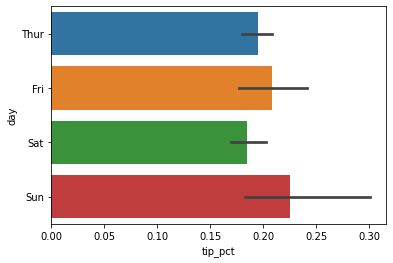

In [ ]:
sns.barplot(x = 'tip_pct',
            y = 'day',
            data = tips,
            orient='h')


Plotting functions in seaborn take a data argument, which can be a *pandas DataFrame*. The other argument refers to column names. Since there are multiple observations for each value in the day the bars are the average value of tip_pct.

The black lines drawn on the bars represent the *95% confidence interval* (optional configuration).

```seaborn.barplot``` has a hue option that enables us to split an additional categorical value.


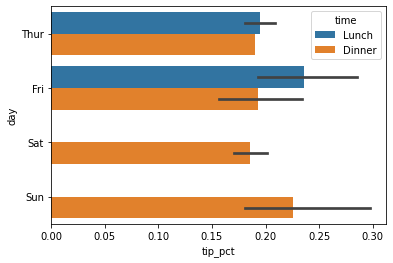

In [ ]:
sns.barplot(x = 'tip_pct',
            y = 'day',
            hue = 'time',
            data = tips,
            orient = 'h')

**Note**: Seaborn has automatically changed the aesthetics of plots: the default color palette, plot background, and grid line colors. We can switch between different plot appearences using seaborn.set

## Histograms and Density Plots

### What is a histogram?

A histogram is a kind of bar plot that gives a *discretized* display of value frequency. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted. 

e.g:
We can make a histogram of tip percentages of the total bill using the plot.hist method on the Series

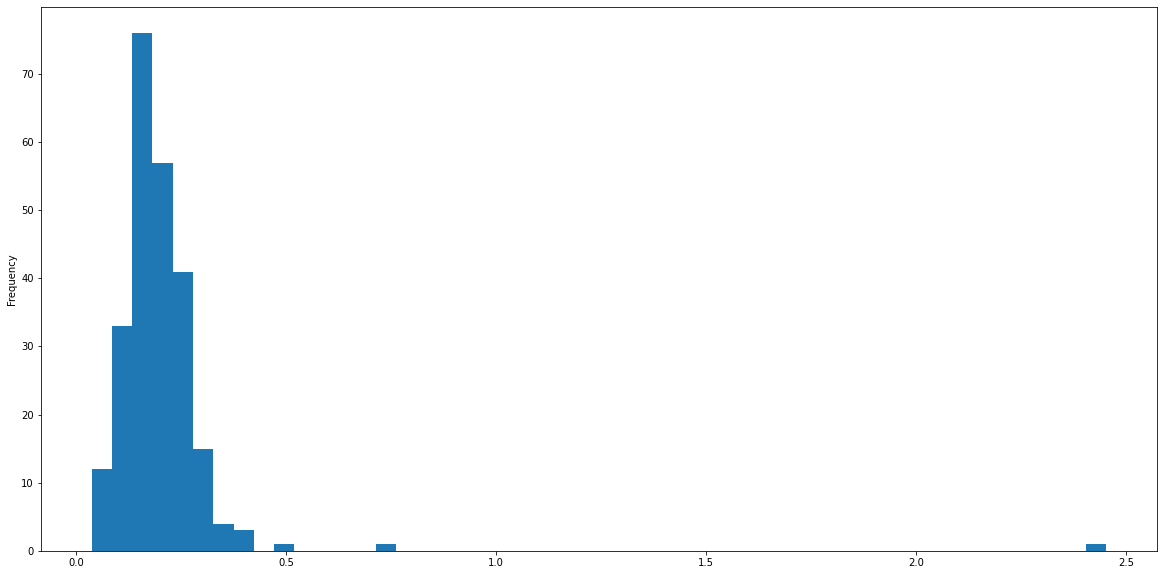

In [ ]:
tips['tip_pct'].plot.hist(bins = 50,figsize = (20,10))



### What is a Density Plot

Similar to historgram, the *density plot* is formed by putting an estimate of a continous probability distribution that might have generated the observed data. The usual procedure is to approximate the distribution as a mixture of *kernels**. 
**Kernels** are simpler distributions like normal distribution.


Using ```plot.kde``` and ```plot.density``` makes a density plot using the conventional mixture-of-normals estimate.

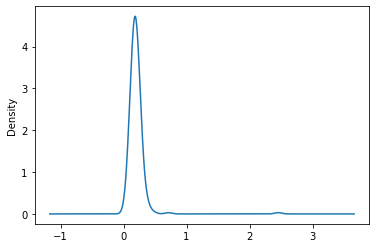

In [ ]:
tips['tip_pct'].plot.density()

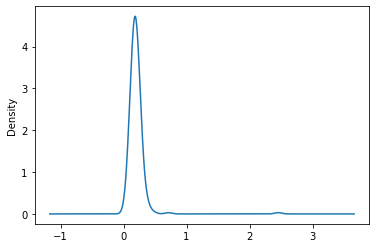

In [ ]:
tips['tip_pct'].plot.kde()

**So why seaborn?**

Seaborn makes histograms and density plots even easier through its ```distplot``` method, this lets the plot be both a histogram and a continous density estimate simultaneously.

For example:

Consider a distribution consisting of draws from two different standard normal distribution.

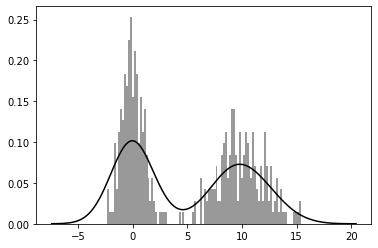

In [ ]:
import numpy as np

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size = 200)
values = pd.Series(np.concatenate([comp1,comp2])) 
sns.distplot(values,bins = 100,color = 'k')

**Lets observe the Code above.**

We create two variables using Numpys-> Random-> Normal Library [**CONTINUE**]

# Tutorial

## Connecting to Your Google Drive


In [1]:
# Start by connecting google drive into google colab

from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
!ls "/content/gdrive/My Drive/DigitalHistory/"

'List Operations.ipynb'
'String Operations.ipynb'
 tmp
'Topics For Later Sections.gdoc'
'Week2-Introduction-to-Python-&-NumPy'
 Week3-Introduction-to-Open-Data-Importing-Data-and-Basic-Data-Wrangling
 Week4-Introduction-to-Data-Visualization-Graphs-Charts-and-Tables
 Week5-Visualizing-the-Translatlantic-Slave-Trade
 Week6-Advanced-Data-Wrangling-using-Pandas
 Week7-Intro-to-Statistical-Analysis-and-Methods
 Week8-PROJECT-Analyze-Trans-Atlantic-Slave-Trade.ipynb
 Week8-Statistical-Visualization-using-Seaborn-and-Pandas


In [5]:
cd "/content/gdrive/My Drive/DigitalHistory/Week8-Statistical-Visualization-using-Seaborn-and-Pandas/data"

/content/gdrive/My Drive/DigitalHistory/Week8-Statistical-Visualization-using-Seaborn-and-Pandas/data


In [6]:
ls

pokemon.csv.zip


## Import Libraries and unpack file



In [7]:
import pandas as pd
import zipfile


In [8]:
file_location = 'pokemon.csv.zip'

zip_ref = zipfile.ZipFile(file_location,'r')
zip_ref.extractall('/pokemon')
zip_ref.close()

## Load file

In [10]:
pokemon = pd.read_csv('/pokemon/pokemon.csv')

In [11]:
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


For this exercise lets answer some questions:

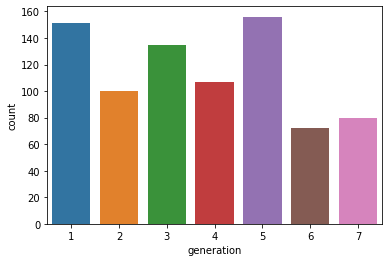

In [14]:
import seaborn as sns
sns.countplot(pokemon['generation'])

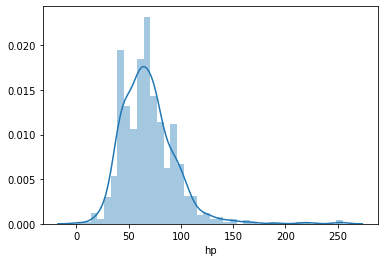

In [16]:
sns.distplot(pokemon['hp'])

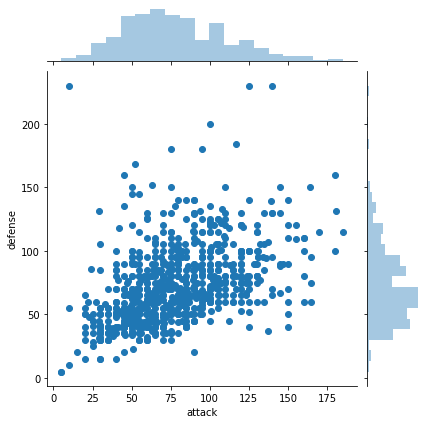

In [17]:
sns.jointplot(x='attack', y='defense', data=pokemon)

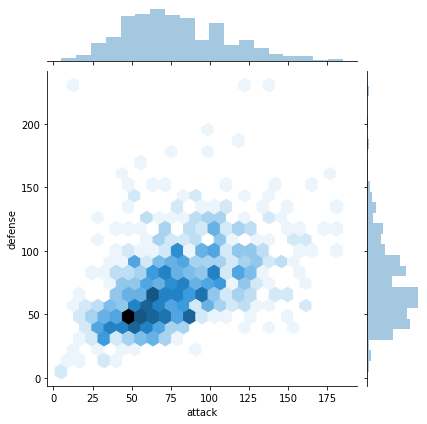

In [19]:
sns.jointplot(x='attack', y='defense', data=pokemon, kind='hex')

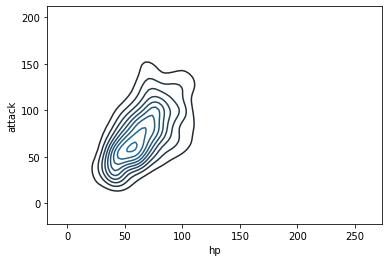

In [21]:
sns.kdeplot(pokemon['hp'], pokemon['attack'])

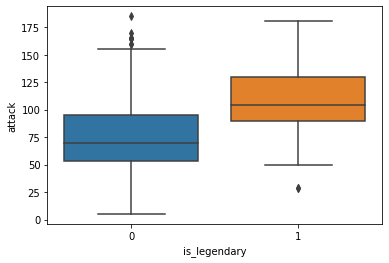

In [24]:
sns.boxplot(x='is_legendary', y='attack', data=pokemon)

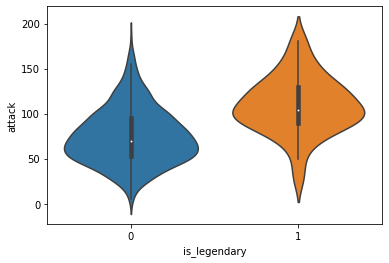

In [26]:
sns.violinplot(x='is_legendary', y='attack', data=pokemon)